In [1]:
!pip install -r requirements.txt | grep -v 'already satisfied'

  Using cached CFEDemands-0.5.4-py2.py3-none-any.whl (47 kB)
  Using cached ConsumerDemands-0.4.1.dev0-py2.py3-none-any.whl (12 kB)
  Using cached eep153_tools-0.11-py2.py3-none-any.whl (4.4 kB)
  Using cached python_gnupg-0.5.0-py2.py3-none-any.whl (18 kB)
  Using cached ray-2.4.0-cp39-cp39-manylinux2014_x86_64.whl (58.6 MB)
  Using cached pandas-2.0.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.4 MB)
  Using cached dvc-2.55.0-py3-none-any.whl (419 kB)
  Using cached xarray-2023.4.2-py3-none-any.whl (979 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached pathspec-0.11.1-py3-none-any.whl (29 kB)
  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
  Using cached grandalf-0.8-py3-none-any.whl (41 kB)
  Using cached flatten_dict-0.4.2-py2.py3-none-any.whl (9.7 kB)
  Using

In [2]:
Phillippines_Data = '1WmIn1GGsZKv9w96fug6fQAQH9GJwkatYMZRoBgB1GqY'

In [3]:
InputFiles = {'Expenditures':(Phillippines_Data,'Expenditures'),
              'HH Characteristics':(Phillippines_Data,'HH Characteristics'),
              'FCT':(Phillippines_Data,'FCT'),
              'Quantities':(Phillippines_Data,'Quantities'),
             'Prices Per Household':(Phillippines_Data,'Prices Per Household')}
InputFiles

{'Expenditures': ('1WmIn1GGsZKv9w96fug6fQAQH9GJwkatYMZRoBgB1GqY',
  'Expenditures'),
 'HH Characteristics': ('1WmIn1GGsZKv9w96fug6fQAQH9GJwkatYMZRoBgB1GqY',
  'HH Characteristics'),
 'FCT': ('1WmIn1GGsZKv9w96fug6fQAQH9GJwkatYMZRoBgB1GqY', 'FCT'),
 'Quantities': ('1WmIn1GGsZKv9w96fug6fQAQH9GJwkatYMZRoBgB1GqY', 'Quantities'),
 'Prices Per Household': ('1WmIn1GGsZKv9w96fug6fQAQH9GJwkatYMZRoBgB1GqY',
  'Prices Per Household')}

In [4]:
from eep153_tools.sheets import read_sheets
import numpy as np
import pandas as pd

def get_clean_sheet(key,sheet=None):

    df = read_sheets(key,sheet=sheet)
    df.columns = [c.strip() for c in df.columns.tolist()]

    df = df.loc[:,~df.columns.duplicated(keep='first')]   

    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

    df = df.loc[~df.index.duplicated(), :]

    return df

# Get expenditures...
x = get_clean_sheet(InputFiles['Expenditures'][0],
                    sheet=InputFiles['Expenditures'][1])

if 'm' not in x.columns:
    x['m'] = 1

x = x.set_index(['i','t','m'])
x.columns.name = 'j'

x = x.apply(lambda x: pd.to_numeric(x,errors='coerce'))
x = x.replace(0,np.nan)

# Get HH characteristics...
z = get_clean_sheet(InputFiles['HH Characteristics'][0],
                    sheet=InputFiles['HH Characteristics'][1])

if 'm' not in z.columns:
    z['m'] = 1

z = z.set_index(['i','t','m'])
z.columns.name = 'k'

z = z.apply(lambda x: pd.to_numeric(x,errors='coerce'))

# Get prices
# Get prices
p = get_clean_sheet(InputFiles['Prices Per Household'][0],
                    sheet=InputFiles['Prices Per Household'][1])

if 'm' not in p.columns:  # Supply "market" indicator if missing
    p['m'] = 1

p = p.set_index(['t','i', 'm'])
p.columns.name = 'j'

p = p.apply(lambda x: pd.to_numeric(x,errors='coerce'))
p = p.replace(0,np.nan)

for i in p.columns:
    p[i] = p[i].median()

fct = get_clean_sheet(InputFiles['FCT'][0],
                    sheet=InputFiles['FCT'][1])

c = read_sheets(Phillippines_Data,sheet = 'Code Match ')
c.rename(columns ={'Code ':'fct'}, inplace = True)
fct = fct.merge(c, how = 'inner', on = 'fct').drop(columns = ['Member', 'Food ', 'bouisfg', 'foodgrp'], axis = 1)
print (fct)
fct = fct.set_index('name')
fct.columns.name = 'n'

fct = fct.apply(lambda x: pd.to_numeric(x,errors='coerce'))

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.
     fct                name  calorie  protein  fat  carbo  fiber  ash   
0      4  Rice milled, white    367.0      7.4  0.5   80.4    0.4  0.6  \
1     22        Corn, yellow    167.0      4.4  1.5   35.4    1.1  0.8   
2     28  Corn, white, grits    368.0      8.7  2.2   76.7    2.3  0.5   
3     47    Guava, red flesh     92.0      0.9  0.4   23.8    4.8  0.6   
4     67              Durian    147.0      2.0  1.2   36.1    1.9  0.8   
..   ...                 ...      ...      ...  ...    ...    ...  ...   
70  1318     Coconut vinegar      3.0      0.0  0.1    1.4    NaN  0.3   
71  1320                 Tea    357.0     21.7  1.0   65.3   11.2  4.6   
72  1324                Milo    396.0      6.5  4.5   84.9    0.4  2.2   
73  1325          Softdrinks     39.0      0.0  0.0   10.0    0.0  NaN   
74  1330                Beer     42.0      0.3  0.0    3.8    NaN  0

Here, use data on log *expenditures* and household characteristics to
create a CFEDemand `result`.

In [5]:
import cfe

#result = cfe.Regression(y=np.log(x.stack()),d=z)

#result.to_pickle('phillippines_estimates.pickle')
result = cfe.read_pickle('phillippines_estimates.pickle')  # Get persistent result saved above...

# result.get_beta().sort_values(ascending=False) # Check sanity...

Missing dependencies for OracleDemands.


In [6]:
%matplotlib notebook

x_1d = x.groupby('j',axis=1).sum()
x_1d = x_1d.replace(0,np.nan) # Replace zeros with missing

y = np.log(x_1d)

from cfe.estimation import drop_columns_wo_covariance
y = drop_columns_wo_covariance(y,min_obs=30)

y = y.stack()

#df = pd.DataFrame({'y':y,'yhat':result.get_predicted_log_expenditures()})
#df.plot.scatter(x = 'yhat', y = 'y')

In [7]:
import cfe
    
# compute quantity consumed, relevant nutritional data, and nutrients per household 
# from predicted expenditures, nutritional data, and prices
def hh_nutrients(expenditures, nutrition, prices):
    # Expenditures divided by prices/g gives quantities in grams...
    qhat = (expenditures.unstack('j')/prices).dropna(how='all')
    # Drop missing columns
    qhat = qhat.loc[:,qhat.count()>0]
    # translate qhat names to match fct names
    translate = get_clean_sheet(Phillippines_Data, sheet='Code Match ')
    translate = translate.drop(['Member', ''], axis=1)
    translate = translate[translate['Food'].isin(list(qhat.columns))]
    # select only the food names found in both our nutritional data table AND in our quantities table
    fct_names = nutrition[nutrition['fct'].isin(list(translate['Code']))].reset_index()[['name', 'fct']]
    translate_names = translate.merge(fct_names, left_on='Code', right_on='fct')
    names_dict = dict(zip(list(translate_names['Food']), list(translate_names['name'])))
    qhat_fct = qhat.rename(columns=names_dict)
    # select relevant data and remove duplicates
    use = nutrition.index.intersection(qhat_fct.columns)
    nut_fct = nutrition[~nutrition.index.duplicated(keep='first')].loc[use]
    qhat_fct = qhat_fct.loc[:,~qhat_fct.columns.duplicated(keep='first')][use]
    # find the average nutritional content for each household
    return (qhat_fct, nut_fct, qhat_fct[use]@nut_fct.loc[use,:])

xhat = result.predicted_expenditures()

qhat_fct, nut_fct, nutrients = hh_nutrients(xhat, fct, p)

# average nutritional content per year for each household
# nutrients
# average nutritional content per day for each household (6.75 people per household)
nutrients = nutrients / 365
# nutrients

Key available for students@eep153.iam.gserviceaccount.com.


In [8]:
rdi = get_clean_sheet(Phillippines_Data, sheet='RDI')
rdi_cols = rdi['n']
rdi_cleaned = rdi.drop('units', axis=1).set_index(['n'])
hh_char_cleaned = z.drop('log HSize', axis=1)
perhh_rdi = hh_char_cleaned@rdi_cleaned.T

def rdi_difference(hh_characteristics, hh_nutrients):
    # RDI calculations
    # for RDI of a specific household, will need age composition of household * relevant RDIs
    hh_char_cleaned = hh_characteristics.drop('log HSize', axis=1)
    household_rdi = hh_char_cleaned@rdi_cleaned.T
    # ensure both dataframes have same columns and indices
    rdi_use = household_rdi.columns.intersection(hh_nutrients.columns)
    index_use = household_rdi.index.intersection(hh_nutrients.index)

    hhsel_rdi = household_rdi[rdi_use].loc[index_use]
    nutsel_rdi = hh_nutrients[rdi_use].loc[index_use]
    #hhsel_rdi = hhsel_rdi.mean().drop(['fiber', 'ascorbic'])
    #nutsel_rdi = nutsel_rdi.mean().dropna()
    rdi_diff = nutsel_rdi - hhsel_rdi
    rdi_diff = rdi_diff.dropna(axis=1)
    return rdi_diff

# find difference between the actual household nutrient consumption and expected RDI of household
rdi_diff = rdi_difference(z, nutrients)
# rdi_diff

Key available for students@eep153.iam.gserviceaccount.com.


### Change in Demand as a Result of Price Changes

Here, we analyze the change in demand as a result of price changes due to policies such as taxes and subsidies on foods.

In [9]:
# average total expenditures by household
xbar = xhat.groupby(['i','t','m']).sum()

def my_prices(p0,p,j='Eggs'):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    p = p.copy()
    p.loc[j] = p0
    return p

In [10]:
prices = p[list(result.get_beta().index)].mean() # select only the food items found in result

# food: food item we wish to change
# new_price: new price of food item we wish to change
# to simulate demand / nutrition system with new price, replace prices with new_prices
food = 'Eggs'
new_price = prices[food] # prices[food] / 2

new_prices = my_prices(p0=new_price, p=prices, j=food)

# to generate all of the below demand / nutrition graphs with the new prices, uncomment following line:
# prices = new_prices

# demands(x, p)
# x: simulated budget of household
# p: prices of foods to be simulated
result.demands(xbar.quantile(0.5), new_prices)

j
Alcoholic drinks                                  106.026147
Ampalaya                                          602.509123
Atsal                                            1034.941413
Bagoong                                            33.060910
Banana                                           1903.304612
Beef                                              180.324567
Calamansi                                        2864.990954
Carrots                                           280.704003
Chicken                                           413.172772
Coffee                                             77.865798
Coke                                              544.017436
Cooking oil                                       399.832003
Corn products                                     122.882550
Dried fish and smoked fish                         57.001429
Eggs                                              732.269398
Food made from flour                              294.363426
Fresh fish            

<IPython.core.display.Javascript object>


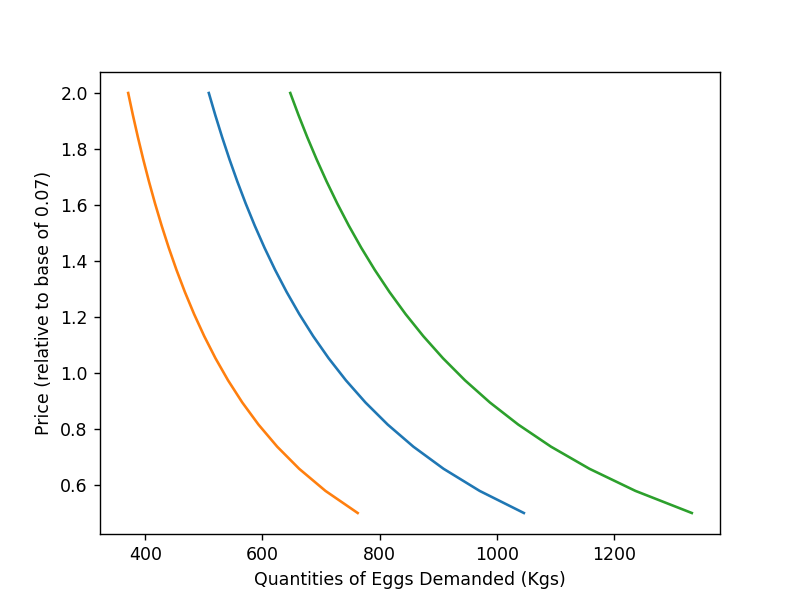

Text(0.5, 0, 'Quantities of Eggs Demanded (Kgs)')

In [11]:
import matplotlib.pyplot as plt
%matplotlib notebook

use = 'Eggs'  # Good we want demand curve for

# Vary prices from 50% to 200% of reference.
scale = np.linspace(.5,2,20)

# Demand for Millet for household at median budget
plt.plot([result.demands(xbar.quantile(0.5),my_prices(prices[use]*s,prices))[use] for s in scale],scale)

# Demand for Millet for household at 25% percentile
plt.plot([result.demands(xbar.quantile(0.25),my_prices(prices[use]*s,prices))[use] for s in scale],scale)

# Demand for Millet for household at 75% percentile
plt.plot([result.demands(xbar.quantile(0.75),my_prices(prices[use]*s,prices))[use] for s in scale],scale)

plt.ylabel(f"Price (relative to base of {prices[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded (Kgs)")

### Deadweight Loss Analysis

In [12]:
def compensating_variation(U0,p0,p1):
    x0 = result.expenditure(U0,p0)
    x1 = result.expenditure(U0,p1)

    return x1-x0

def revenue(U0,p0,p1,type='Marshallian'):
    """(Un)Compensated revenue from taxes changing vector of prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    """
    
    dp = p1 - p0 # Change in prices

    c = result.demands(U0,p1,type=type)

    dp,c = dp.align(c,join='inner')

    return dp.T@c


def deadweight_loss(U0,p0,p1):
    """
    Deadweight loss of tax/subsidy scheme creating wedge in prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    """
    cv = compensating_variation(U0,p0,p1)

    return cv - revenue(U0,p0,p1,type='Hicksian') 
    
    
def compensated_nutrient_demand(U,p,z=None):
    c = r.demands(U,p,z=z,type='Hicksian')
    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    return N

#def compensated_nutrient_adequacy_ratio(U,p):
#    return (compensated_nutrient_demand(U,p)/hh_rdi.T).squeeze()

<IPython.core.display.Javascript object>


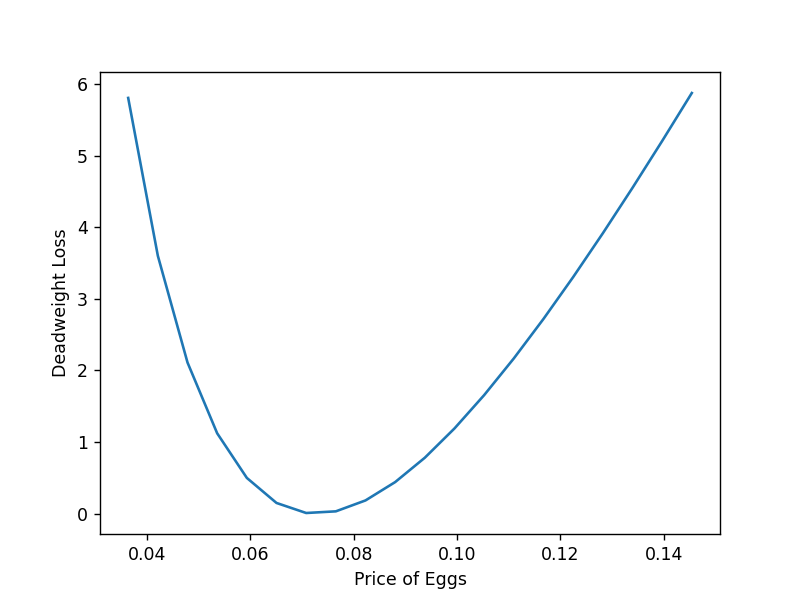

Text(0, 0.5, 'Deadweight Loss')

In [13]:
# Differences between revenue and compensating variation is deadweight-loss:
fig, ax1 = plt.subplots()

my_i = use
u0 = result.indirect_utility(xbar.quantile(0.5), prices)

ax1.plot(prices[my_i]*scale,[deadweight_loss(u0,prices,my_prices(p0,prices, my_i)) for p0 in prices[my_i]*scale])
ax1.set_xlabel("Price of %s" % my_i)
ax1.set_ylabel("Deadweight Loss")

### Change in Nutrition as a function of Demand

In [14]:
UseNutrients = ['calorie','protein','calcium','carbo','iron']

#fct_clean = fct[UseNutrients]
fct_clean = fct.loc[~fct.index.duplicated()]

def my_nutrition(f0, f, j='Rice milled, white', n='calorie'):
    """
    Change nutrition n of jth good to f0, holding other nutritional values fixed.
    """
    f = f.copy()
    f.loc[j][n] = f0
    return f

# to simulate a change in a food's nutritional values, do this here:
fct_food = 'Rice milled, white'
nutrient = 'calorie'
nut_value = fct_clean.loc[fct_food][nutrient]

fct0 = my_nutrition(nut_value, fct_clean, fct_food, nutrient)

# to generate the following graphs with the new nutrition table, uncomment the following line:
# fct_clean = fct0

# demands(x, p)
# x: simulated budget of household
# p: prices of foods to be simulated
def nutrient_demand(x,p):
    c = result.demands(x,p)    
    fct0,c0 = fct_clean.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

# nutritional content (of selected nutrients) as a function of prices
# nutrient_demand(xbar.quantile(0.5), prices)

/tmp/ipykernel_30/2255014419.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.loc[j][n] = f0


<IPython.core.display.Javascript object>


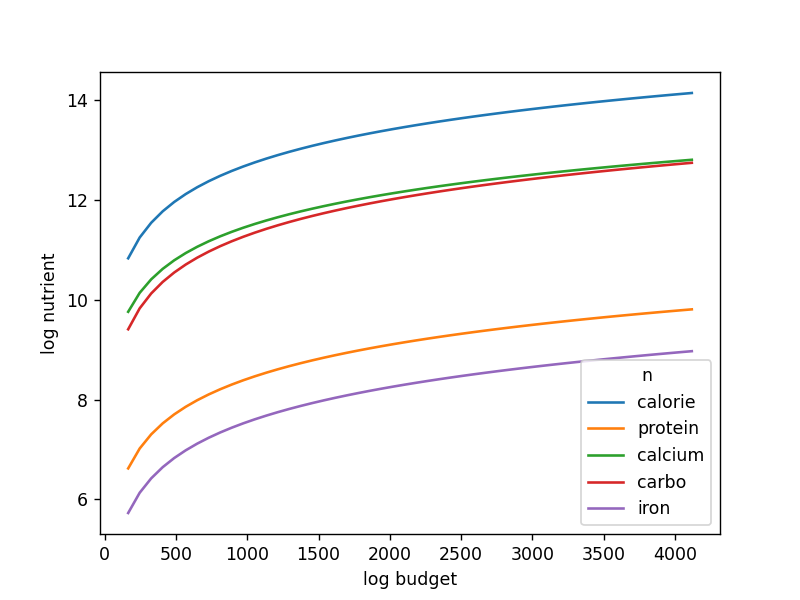

Text(0, 0.5, 'log nutrient')

In [15]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(xbar.quantile(0.5)/5,xbar.quantile(0.5)*5,50)

df = pd.concat({myx:np.log(nutrient_demand(myx,prices))[UseNutrients] for myx in X},axis=1).T
ax = df.plot()

ax.set_xlabel('log budget')
ax.set_ylabel('log nutrient')

In [16]:
hh_rdi = perhh_rdi.mean()*7

def nutrient_adequacy_ratio(x,p):
    return nutrient_demand(x,p)/hh_rdi

#rdi.replace('', 0)@perhh_rdi
#perhh_rdi
#rdi.replace('', 0)['n']
#nutrient_demand(xbar.quantile(0.5), prices)
nutrient_adequacy_ratio(xbar.quantile(0.5), prices)

n
                  NaN
ascorbic    20.201032
ash               NaN
blufct            NaN
calcium      1.998867
calorie      2.746303
carbo       10.641728
carotene          NaN
edpor             NaN
fat          0.523979
fct               NaN
fiber        0.946947
iron         1.959260
niacin       4.024384
phos         3.707131
protein      1.400631
retinol      0.218728
riboflav     2.757071
thiamine     2.952103
dtype: float64

<IPython.core.display.Javascript object>


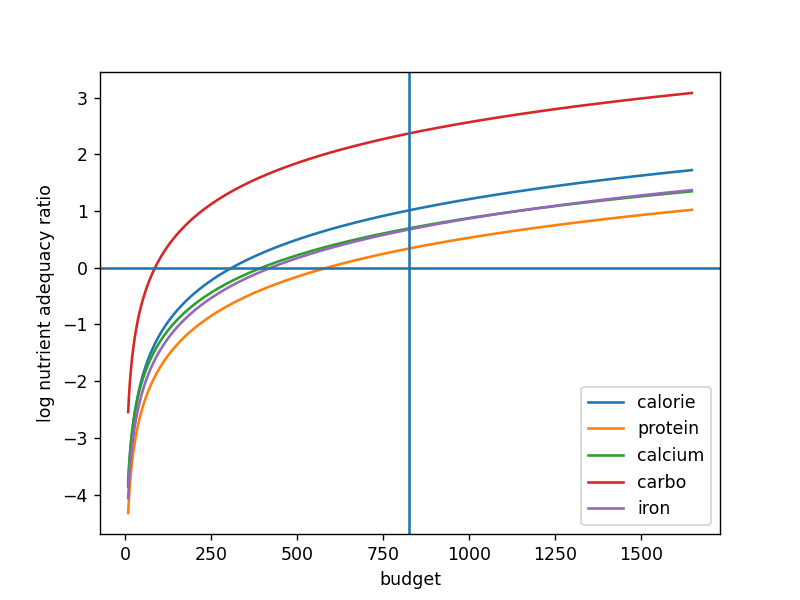

In [17]:
X = np.geomspace(.01*xbar.quantile(0.5),2*xbar.quantile(0.5),100)
pd.DataFrame({x:np.log(nutrient_adequacy_ratio(x,prices))[UseNutrients] for x in X}).T.plot()
plt.legend(UseNutrients)
plt.xlabel('budget')
plt.ylabel('log nutrient adequacy ratio')
plt.axhline(0)
plt.axvline(xbar.quantile(0.5))
